In [ ]:
import string
import geopy.distance
import matplotlib.pylab as plt
import numpy as np
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
def make_normalized_dic(city):

    raw_txt=open(f'Beta/Data/Output/{city}/{city}_bow_normalized.txt', 'r')

    def iterate_raw(file):
        new_dic = {}
        for line in file:
            vals = line.replace(' ', '').split(':')
            key = vals[0].translate(str.maketrans('','',string.punctuation.replace("'", "'’"))).lower()
            if key not in new_dic:
                new_dic[key] = vals[1]
            else:
                new_dic[key] += vals[1]
        return dict(sorted(new_dic.items(), key=lambda item: item[1]))

    bow = iterate_raw(raw_txt)

    raw_txt.close()

    return bow

In [ ]:
def make_similarity_dic(city):

    raw_txt=open(f'Beta/Data/Output/{city}/{city}_similarity_dic.txt', 'r')

    def iterate_raw(file):
        new_dic = {}
        for line in file:
            vals = line.replace(' ', '').split(':')
            key = vals[0].translate(str.maketrans('','',string.punctuation.replace("'", "'’"))).lower()
            if key not in new_dic:
                new_dic[key] = vals[1]
            else:
                new_dic[key] += vals[1]
        return dict(sorted(new_dic.items(), key=lambda item: item[1]))

    bow = iterate_raw(raw_txt)

    raw_txt.close()

    return bow

In [ ]:
def make_distance_dic(city):

    raw_txt=open(f'Beta/Data/Output/{city}/{city}_distance_dic.txt', 'r')

    def iterate_raw(file):
        new_dic = {}
        for line in file:
            vals = line.replace(' ', '').split(':')
            key = vals[0].translate(str.maketrans('','',string.punctuation.replace("'", "'’"))).lower()
            if key not in new_dic:
                new_dic[key] = float(vals[1])
            else:
                new_dic[key] += float(vals[1])
        return dict(sorted(new_dic.items(), key=lambda item: item[1]))

    bow = iterate_raw(raw_txt)

    raw_txt.close()

    return bow

In [ ]:
def write_dict_to_file(file_name, dictionary):
    with open(file_name, 'w') as new_file:
        for key, value in dictionary.items():
            new_file.write('%s : %d\n' % (key, value))

In [ ]:
def write_dict_to_file_float(file_name, dictionary):
    with open(file_name, 'w') as new_file:
        for key, value in dictionary.items():
            new_file.write('%s : %s\n' % (key, value))

In [ ]:
cities = ['ANA', 'ATL', 'AZ', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE', 'COL', 'DET', 'FLA', 'HOU', 'KCR','LAD',
         'MIL', 'MIN', 'NYM','NYY', 'OAK', 'PHI', 'PIT', 'SDP', 'SEA', 'SFG', 'STL', 'TBD', 'TEX', 'TOR', 'WSN']

In [ ]:
city_lats = {
    'ANA': 33.800031, 'OAK': 37.751614, 'SEA': 47.591217, 'HOU': 29.757224, 'TEX': 32.751207,
    'COL': 39.755878, 'SDP': 32.707206, 'LAD': 34.07358, 'SFG': 37.778361, 'AZ': 33.445498,
    'STL': 38.62248, 'CIN': 39.097392, 'CHC': 41.948036, 'PIT': 40.446993, 'MIL': 43.02834,
    'ATL': 33.890961, 'NYM': 40.756743, 'PHI': 39.905763, 'FLA': 25.778194, 'WSN': 38.872705,
    'CLE': 41.496183, 'MIN': 44.981703, 'KCR': 39.051355, 'DET': 42.339308, 'CHW': 41.830087,
    'NYY': 40.829519, 'TBD': 27.768214, 'BOS': 42.346361, 'BAL': 39.283658, 'TOR': 43.641684
}

In [ ]:
city_longs = {
    'ANA': -117.883017, 'OAK': -122.200574, 'SEA': -122.332721, 'HOU': -95.35521, 'TEX': -97.082635,
    'COL': -104.994192, 'SDP': -117.15706, 'LAD': -118.240147, 'SFG': -122.389712, 'AZ': -112.066694,
    'STL': -90.193205, 'CIN': -84.506852, 'CHC': -87.65569, 'PIT': -80.005987, 'MIL': -87.971451,
    'ATL': -84.467772, 'NYM': -73.845994, 'PHI': -75.166574, 'FLA': -80.219668, 'WSN': -77.007632,
    'CLE': -81.685699, 'MIN': -93.278072, 'KCR': -94.480666, 'DET': -83.048876, 'CHW': -87.63405,
    'NYY': -73.926739, 'TBD': -82.653295, 'BOS': -71.097631, 'BAL': -76.621801, 'TOR': -79.389235
}

# Limit to 5000 words

In [ ]:
def make_dic(city):

    raw_txt=open(f'Beta/Data/Output/{city}/{city}_bow.txt', 'r')

    def iterate_raw(file):
        new_dic = {}
        for line in file:
            vals = line.replace(' ', '').split(':')
            key = vals[0].translate(str.maketrans('','',string.punctuation.replace("'", "'’"))).lower()
            if key not in new_dic:
                new_dic[key] = int(vals[1])
            else:
                new_dic[key] += int(vals[1])
        return dict(sorted(new_dic.items(), key=lambda item: item[1]))

    bow = iterate_raw(raw_txt)

    raw_txt.close()

    return bow

In [ ]:
for city in cities:
    bow = make_dic(city)

    if len(bow) > 5000:
        diff = len(bow) - 5000
        for i in range(diff):
            del(bow[min(bow, key=lambda k: abs(bow[k]))])

    write_dict_to_file(f'{city}_bow.txt', bow)

# Normalize BoWs

In [ ]:
def make_original_dic(city):

    raw_txt=open(f'Beta/Data/Output/{city}/IP/{city}_IP_bow.txt', 'r')

    def iterate_raw(file):
        new_dic = {}
        for line in file:
            vals = line.replace(' ', '').split(':')
            key = vals[0].translate(str.maketrans('','',string.punctuation.replace("'", "'’"))).lower()
            if key not in new_dic:
                new_dic[key] = int(vals[1])
            else:
                new_dic[key] += int(vals[1])
        return dict(sorted(new_dic.items(), key=lambda item: item[1]))

    bow = iterate_raw(raw_txt)

    raw_txt.close()

    return bow

In [ ]:
def make_final_dic(city):

    raw_txt=open(f'Beta/Data/Output/{city}/{city}_bow.txt', 'r')

    def iterate_raw(file):
        new_dic = {}
        for line in file:
            vals = line.replace(' ', '').split(':')
            key = vals[0].translate(str.maketrans('','',string.punctuation.replace("'", "'’"))).lower()
            if key not in new_dic:
                new_dic[key] = int(vals[1])
            else:
                new_dic[key] += int(vals[1])
        return dict(sorted(new_dic.items(), key=lambda item: item[1]))

    bow = iterate_raw(raw_txt)

    raw_txt.close()

    return bow

In [ ]:
for city in cities:
    old_bow = make_original_dic(city)
    bow = make_final_dic(city)

    bow = {word : val / len(old_bow) for word, val in bow.items()}

    with open(f'Beta/Data/Output/{city}/{city}_bow_normalized.txt', 'w') as new_file:
        for key, value in bow.items():
            new_file.write('%s : %s\n' % (key, value))

# Testing Normalized Dics

In [ ]:
az_normalized_bow = make_normalized_dic('AZ')
atl_normalized_bow = make_normalized_dic('ATL')

# Compute the dot product
similarity = 0
for word in set(az_normalized_bow.keys()).intersection(atl_normalized_bow.keys()):
    similarity += float(az_normalized_bow[word]) * float(atl_normalized_bow[word])

print(similarity)

0.015569376152000021


In [ ]:
az_normalized_bow = make_normalized_dic('AZ')
sdp_normalized_bow = make_normalized_dic('SDP')

# Compute the dot product
similarity = 0
for word in set(az_normalized_bow.keys()).intersection(sdp_normalized_bow.keys()):
    similarity += float(az_normalized_bow[word]) * float(sdp_normalized_bow[word])

print(similarity)

0.01905269963400001


In [ ]:
sfg_normalized_bow = make_normalized_dic('SFG')
oak_normalized_bow = make_normalized_dic('OAK')

# Compute the dot product
similarity = 0
for word in set(sfg_normalized_bow.keys()).intersection(oak_normalized_bow.keys()):
    similarity += float(sfg_normalized_bow[word]) * float(oak_normalized_bow[word])

print(similarity)

0.023027644941999985


In [ ]:
sfg_normalized_bow = make_normalized_dic('SFG')
nyy_normalized_bow = make_normalized_dic('NYY')

# Compute the dot product
similarity = 0
for word in set(sfg_normalized_bow.keys()).intersection(nyy_normalized_bow.keys()):
    similarity += float(sfg_normalized_bow[word]) * float(nyy_normalized_bow[word])

print(similarity)

0.014343604621000015


In [ ]:
nym_normalized_bow = make_normalized_dic('NYM')
nyy_normalized_bow = make_normalized_dic('NYY')

# Compute the dot product
similarity = 0
for word in set(nym_normalized_bow.keys()).intersection(nyy_normalized_bow.keys()):
    similarity += float(nym_normalized_bow[word]) * float(nyy_normalized_bow[word])

print(similarity)

0.021894013074999955


In [ ]:
bos_normalized_bow = make_normalized_dic('BOS')
nyy_normalized_bow = make_normalized_dic('NYY')

# Compute the dot product
similarity = 0
for word in set(bos_normalized_bow.keys()).intersection(nyy_normalized_bow.keys()):
    similarity += float(bos_normalized_bow[word]) * float(nyy_normalized_bow[word])

print(similarity)

0.019392557457


In [ ]:
bos_normalized_bow = make_normalized_dic('BOS')
hou_normalized_bow = make_normalized_dic('HOU')

# Compute the dot product
similarity = 0
for word in set(bos_normalized_bow.keys()).intersection(hou_normalized_bow.keys()):
    similarity += float(bos_normalized_bow[word]) * float(hou_normalized_bow[word])

print(similarity)

# Higher than expected

0.020340817262999997


In [ ]:
tbd_normalized_bow = make_normalized_dic('TBD')
sea_normalized_bow = make_normalized_dic('SEA')

# Compute the dot product
similarity = 0
for word in set(tbd_normalized_bow.keys()).intersection(sea_normalized_bow.keys()):
    similarity += float(tbd_normalized_bow[word]) * float(sea_normalized_bow[word])

print(similarity)

0.011364118067000006


In [ ]:
chc_normalized_bow = make_normalized_dic('CHC')
chw_normalized_bow = make_normalized_dic('CHW')

# Compute the dot product
similarity = 0
for word in set(chc_normalized_bow.keys()).intersection(chw_normalized_bow.keys()):
    similarity += float(chc_normalized_bow[word]) * float(chw_normalized_bow[word])

print(similarity)

# Not as high as I thought it would be

0.017680506228999967


In [ ]:
tex_normalized_bow = make_normalized_dic('TEX')
hou_normalized_bow = make_normalized_dic('HOU')

# Compute the dot product
similarity = 0
for word in set(tex_normalized_bow.keys()).intersection(hou_normalized_bow.keys()):
    similarity += float(tex_normalized_bow[word]) * float(hou_normalized_bow[word])

print(similarity)

0.028768686501


In [ ]:
ana_normalized_bow = make_normalized_dic('ANA')
lad_normalized_bow = make_normalized_dic('LAD')

# Compute the dot product
similarity = 0
for word in set(ana_normalized_bow.keys()).intersection(lad_normalized_bow.keys()):
    similarity += float(ana_normalized_bow[word]) * float(lad_normalized_bow[word])

print(similarity)

0.019376338875000003


In [ ]:
tbd_normalized_bow = make_normalized_dic('TBD')
fla_normalized_bow = make_normalized_dic('FLA')

# Compute the dot product
similarity = 0
for word in set(tbd_normalized_bow.keys()).intersection(fla_normalized_bow.keys()):
    similarity += float(tbd_normalized_bow[word]) * float(fla_normalized_bow[word])

print(similarity)

# Not as high as I thought it would be

0.014427517207000001


In [ ]:
mil_normalized_bow = make_normalized_dic('MIL')
min_normalized_bow = make_normalized_dic('MIN')

# Compute the dot product
similarity = 0
for word in set(mil_normalized_bow.keys()).intersection(min_normalized_bow.keys()):
    similarity += float(mil_normalized_bow[word]) * float(min_normalized_bow[word])

print(similarity)

0.025005213247999997


In [ ]:
mil_normalized_bow = make_normalized_dic('MIL')
col_normalized_bow = make_normalized_dic('COL')

# Compute the dot product
similarity = 0
for word in set(mil_normalized_bow.keys()).intersection(col_normalized_bow.keys()):
    similarity += float(mil_normalized_bow[word]) * float(col_normalized_bow[word])

print(similarity)

# WAY TOO HIGH!

0.031290988024000016


In [ ]:
mil_normalized_bow = make_normalized_dic('MIL')
wsn_normalized_bow = make_normalized_dic('WSN')

# Compute the dot product
similarity = 0
for word in set(mil_normalized_bow.keys()).intersection(wsn_normalized_bow.keys()):
    similarity += float(mil_normalized_bow[word]) * float(wsn_normalized_bow[word])

print(similarity)

# Higher than expected

0.02173112903700001


In [ ]:
min_normalized_bow = make_normalized_dic('MIN')
wsn_normalized_bow = make_normalized_dic('WSN')

# Compute the dot product
similarity = 0
for word in set(min_normalized_bow.keys()).intersection(wsn_normalized_bow.keys()):
    similarity += float(min_normalized_bow[word]) * float(wsn_normalized_bow[word])

print(similarity)

# Higher than expected

0.02243354430000001


In [ ]:
az_normalized_bow = make_normalized_dic('AZ')
tor_normalized_bow = make_normalized_dic('TOR')

# Compute the dot product
similarity = 0
for word in set(az_normalized_bow.keys()).intersection(tor_normalized_bow.keys()):
    similarity += float(az_normalized_bow[word]) * float(tor_normalized_bow[word])

print(similarity)

0.01601998966999999


# Comparing Across All Cities

In [ ]:
ana_normalized_bow = make_normalized_dic('ANA')
similarity_dic = {}

for city2 in cities:
    if city2 != 'ANA':
        city2_normalized_bow = make_normalized_dic(city2)

        # Compute the dot product
        similarity = 0
        for word in set(ana_normalized_bow.keys()).intersection(city2_normalized_bow.keys()):
            similarity += float(ana_normalized_bow[word]) * float(city2_normalized_bow[word])

        similarity_dic[city2] = similarity

with open(f'Beta/Data/Output/ANA/ANA_similarity_dic.txt', 'w') as new_file:
    for key, value in similarity_dic.items():
        new_file.write('%s : %s\n' % (key, value))

In [ ]:
for city in cities:
    normalized_bow = make_normalized_dic(city)
    similarity_dic = {}

    for city2 in cities:
        if city != city2:
            city2_normalized_bow = make_normalized_dic(city2)

            # Compute the dot product
            similarity = 0
            for word in set(normalized_bow.keys()).intersection(city2_normalized_bow.keys()):
                similarity += float(normalized_bow[word]) * float(city2_normalized_bow[word])

            similarity_dic[city2] = similarity

    with open(f'Beta/Data/Output/{city}/{city}_similarity_dic.txt', 'w') as new_file:
        for key, value in similarity_dic.items():
            new_file.write('%s : %s\n' % (key, value))

In [ ]:
for city in cities:
    city_lat = city_lats[city]
    city_long = city_longs[city]
    city_coords = (city_lat, city_long)

    distance_dic = {}

    for city2 in cities:
        if city != city2:
            city2_lat = city_lats[city2]
            city2_long = city_longs[city2]
            city2_coords = (city2_lat, city2_long)

            # Distance between the two stadiums (km)
            distance = geopy.distance.geodesic(city_coords, city2_coords).km

            distance_dic[city2] = distance

    with open(f'Beta/Data/Output/{city}/{city}_distance_dic.txt', 'w') as new_file:
        for key, value in distance_dic.items():
            new_file.write('%s : %s\n' % (key, value))

# Cosine Similarities vs Distance

In [ ]:
def detect_outliers(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    print('mean:', mean)
    print('std:', std)
    # print('outliers:')

    outliers = []

    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)

    return outliers

mean: 0.017816977873505703
std: 0.0031615450209772408

ANA


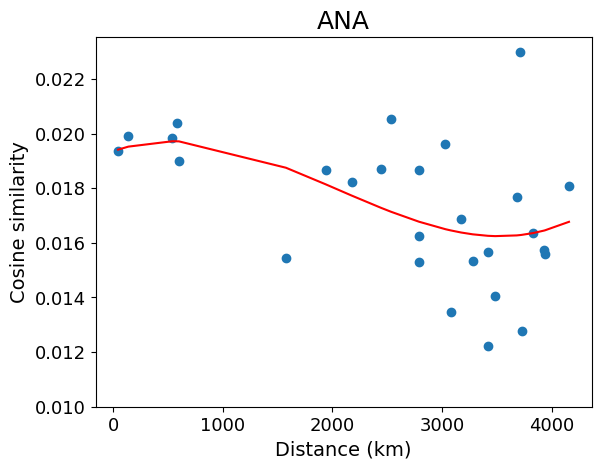




mean: 0.014719124226534862
std: 0.0017482113995916627

ATL


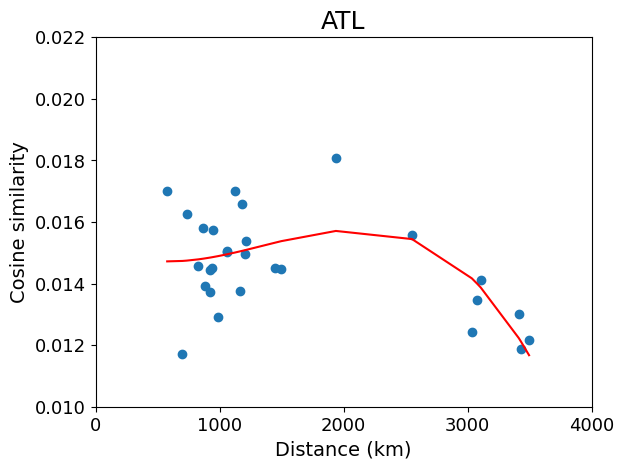




mean: 0.0215674946224404
std: 0.004981378664914148

AZ


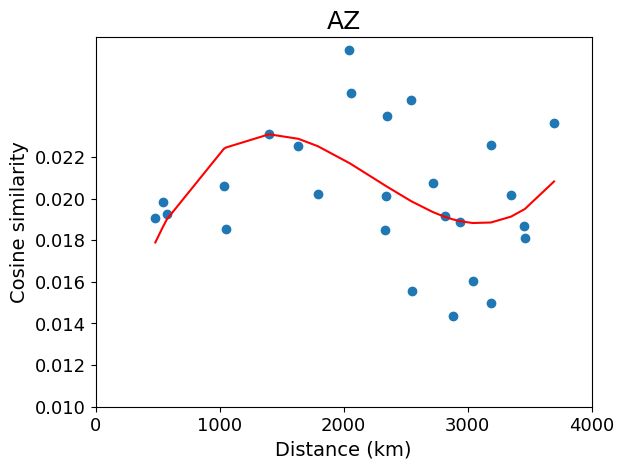




mean: 0.026545257100869406
std: 0.00746554252110775

BAL


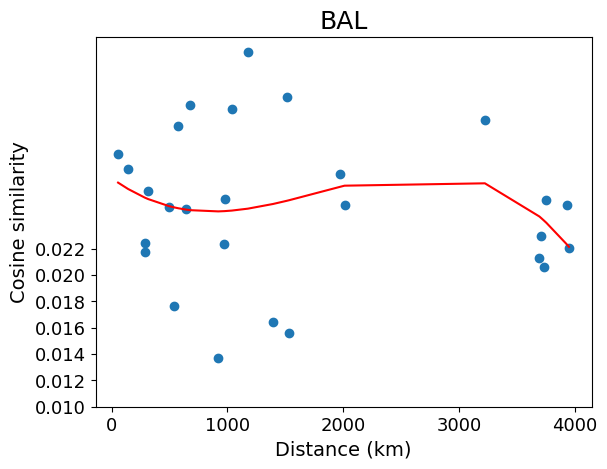




mean: 0.020816957857273808
std: 0.004836380467031287

BOS


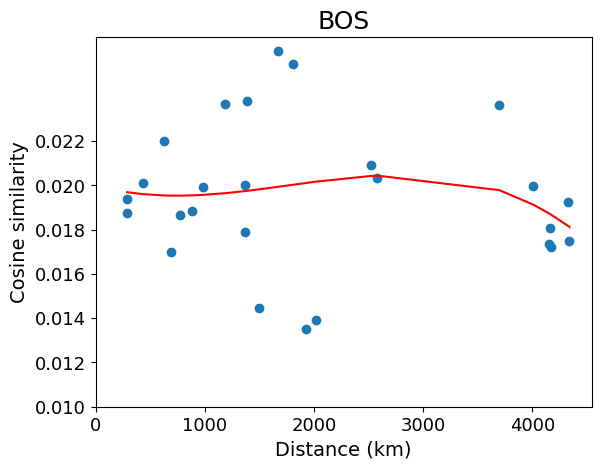




mean: 0.018497539336593795
std: 0.003422193270880693

CHC


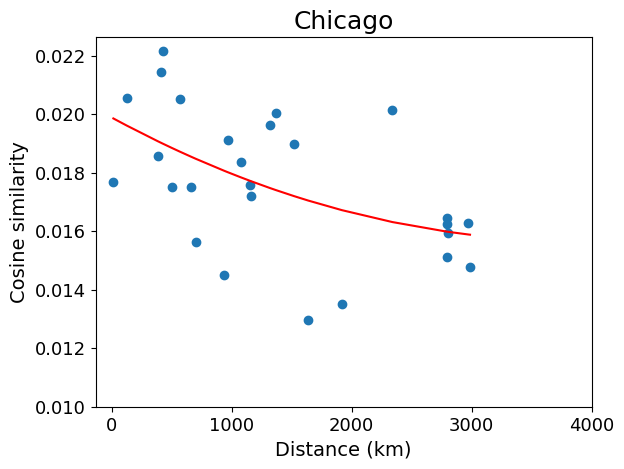




mean: 0.01708360950074348
std: 0.002769908754474098

CHW


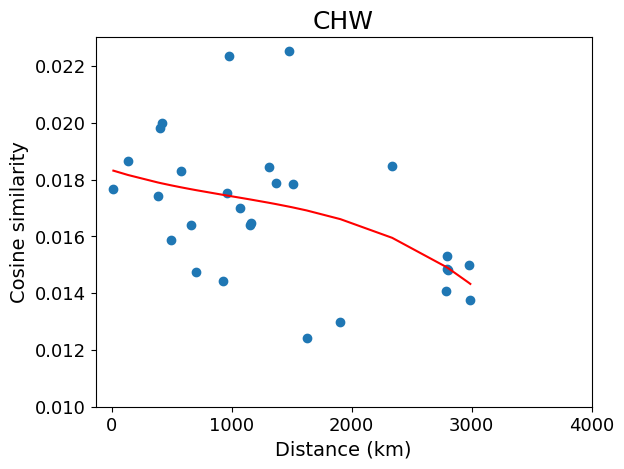




mean: 0.02227711533395482
std: 0.004581103022931329

CIN


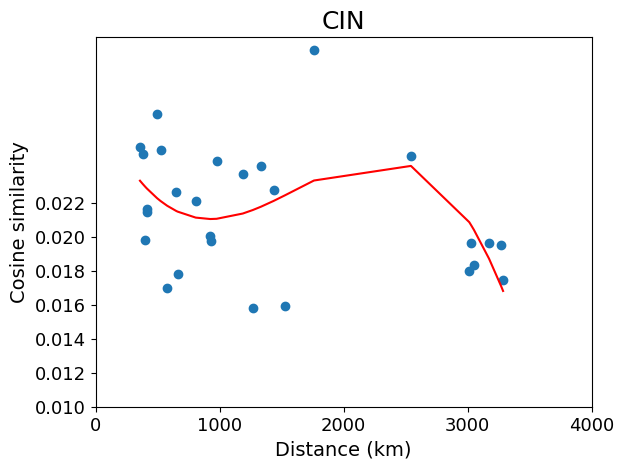




mean: 0.01783948498677114
std: 0.0036036493579175715

CLE


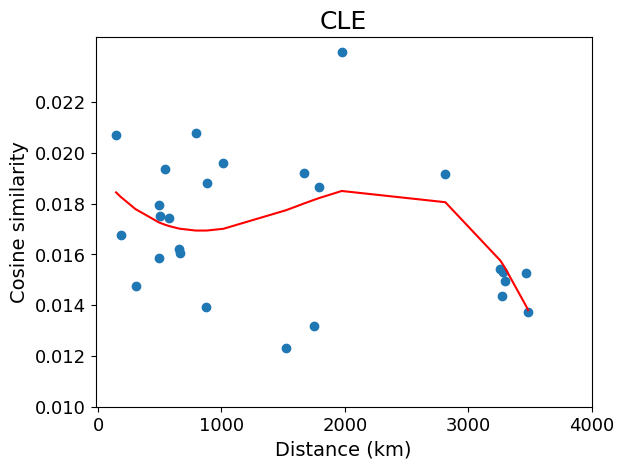




mean: 0.02682975302276302
std: 0.007006971573493433

COL


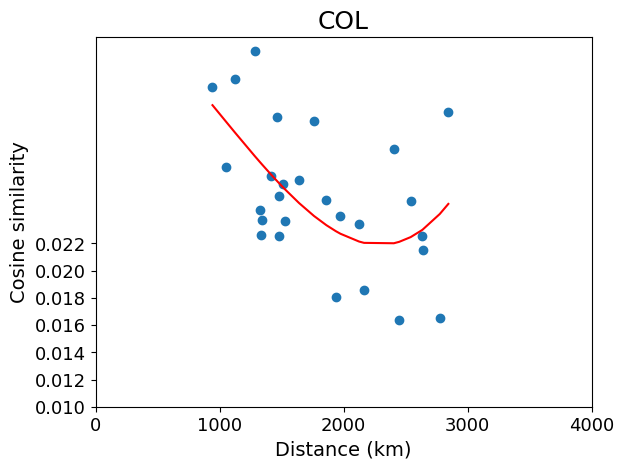




mean: 0.019106646512838155
std: 0.003313594019382035

DET


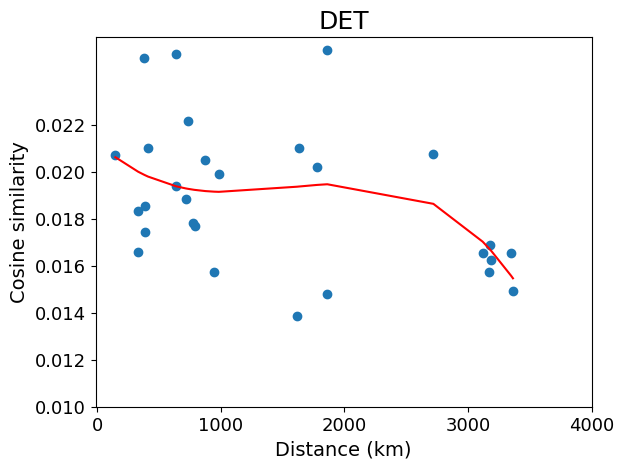




mean: 0.014207201077891585
std: 0.0015391958063420902

FLA


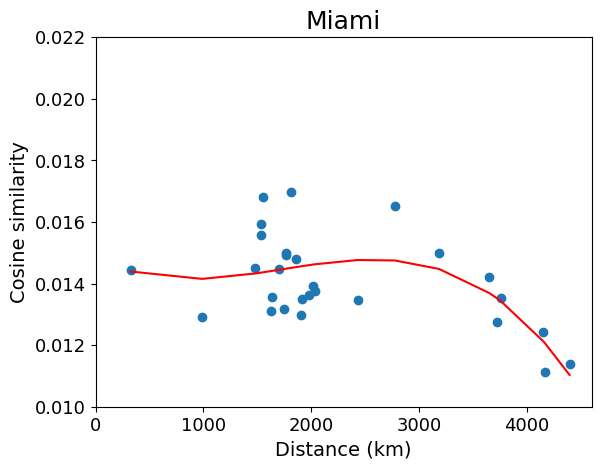




mean: 0.020029232878163963
std: 0.003512386476034918

HOU


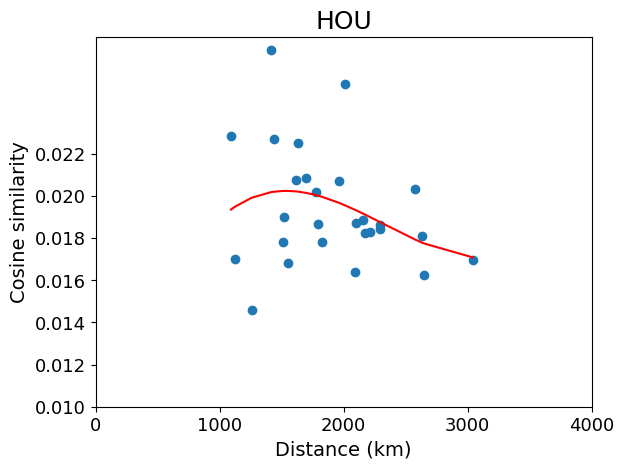




mean: 0.02838641849378368
std: 0.00755030084390556

KCR


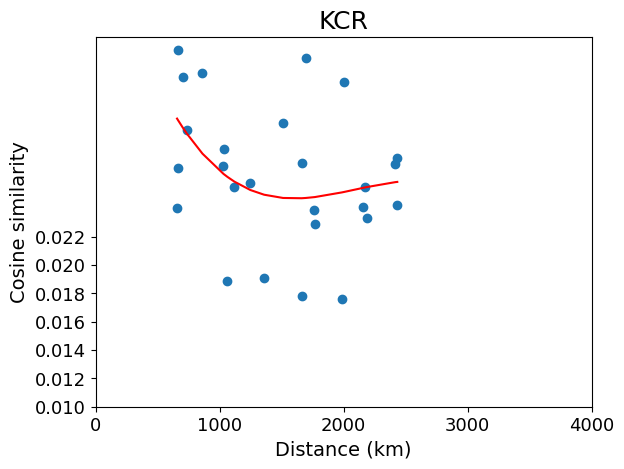




mean: 0.0172122595545818
std: 0.002594018640047162

LAD


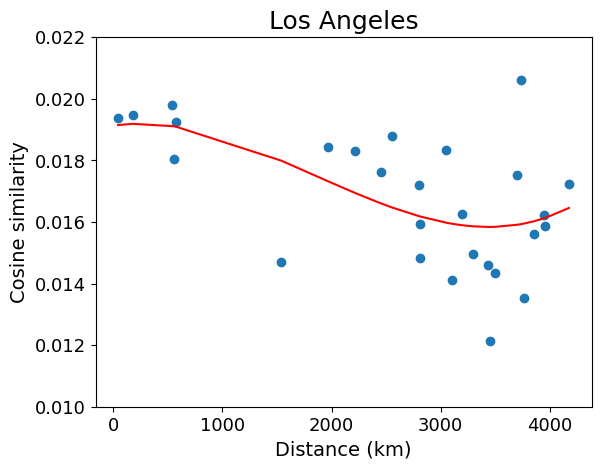




mean: 0.021126769550273126
std: 0.004933364630833418

MIL


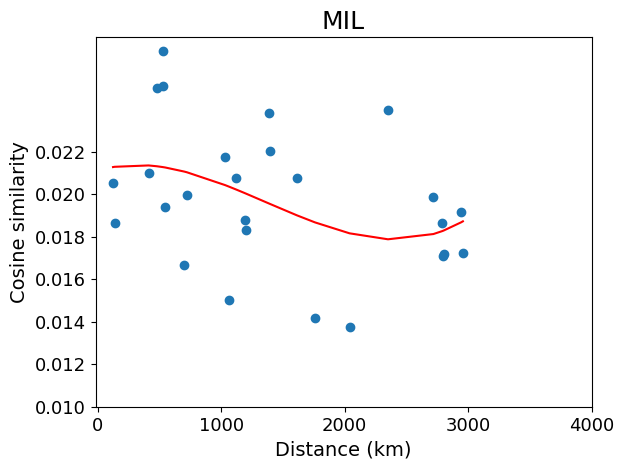




mean: 0.02143576760088053
std: 0.005493663717434344

MIN


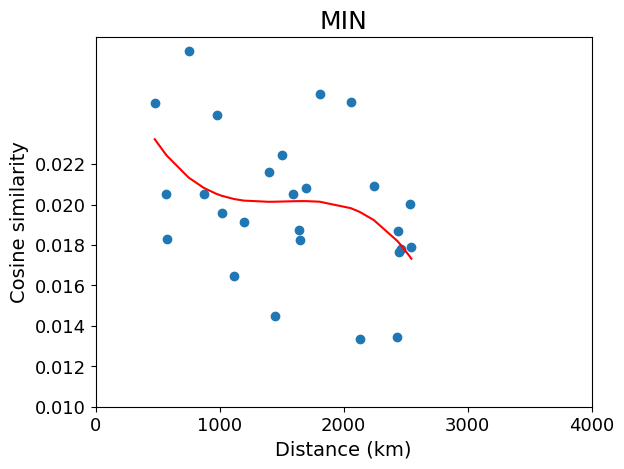




mean: 0.01763657723008789
std: 0.002373090936177412

NYM


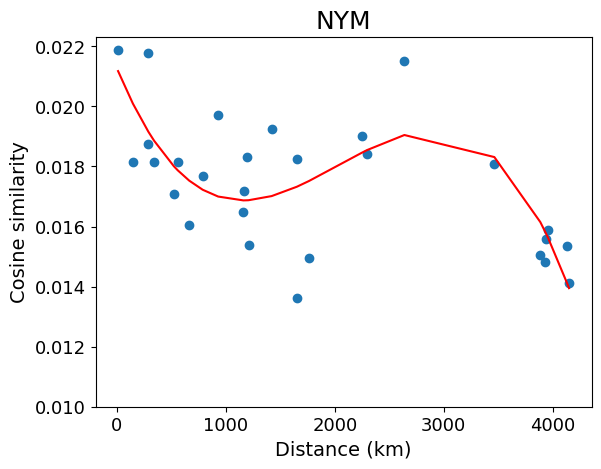




mean: 0.01796329148144867
std: 0.0025700626727263197

NYY


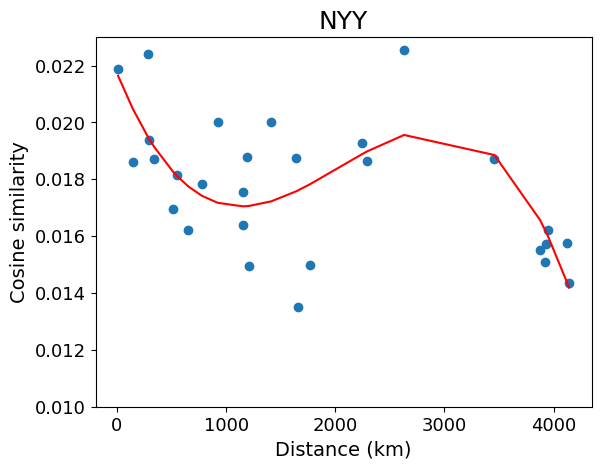




mean: 0.018277255163073252
std: 0.003879978723575819

OAK


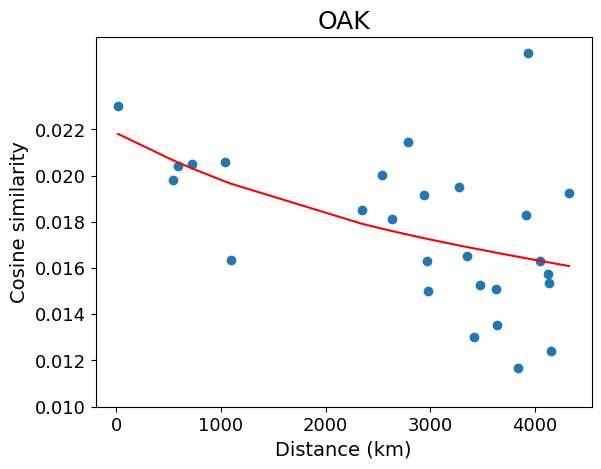




mean: 0.018763567182765957
std: 0.003625800800767925

PHI


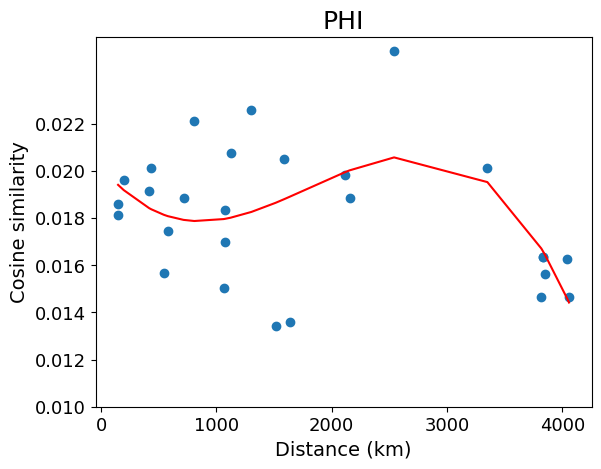




mean: 0.017808857605985523
std: 0.003395059369459271

PIT


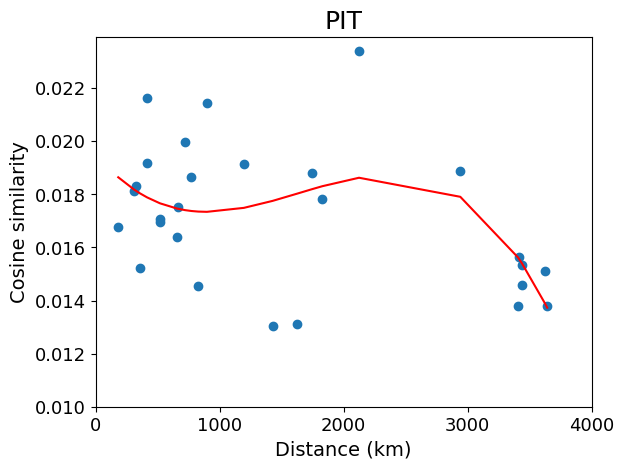




mean: 0.01703964602185962
std: 0.0031361286222545918

SDP


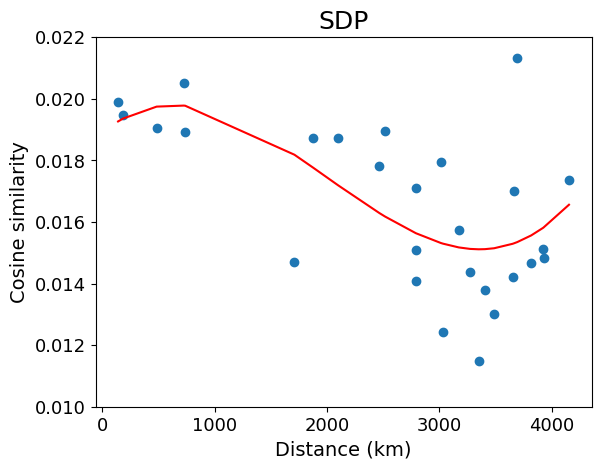




mean: 0.01742137107752662
std: 0.004073181297428038

SEA


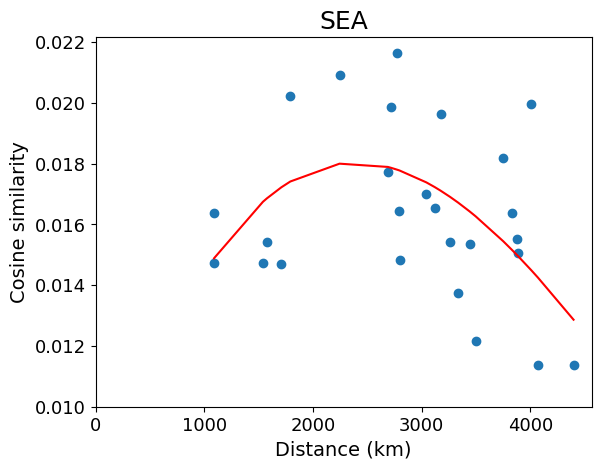




mean: 0.016583912905744232
std: 0.0035322711753270914

SFG


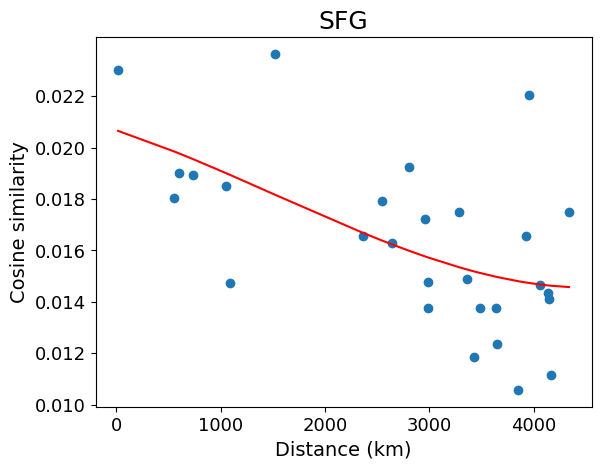




mean: 0.023216288504003105
std: 0.006465744958597816

STL


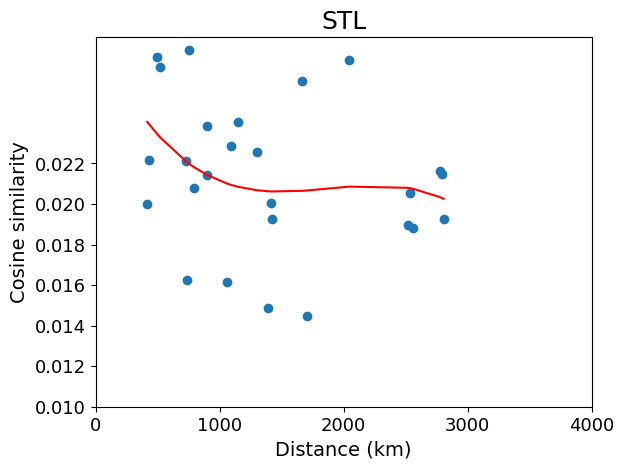




mean: 0.01356197887753667
std: 0.0016624817387092602

TBD


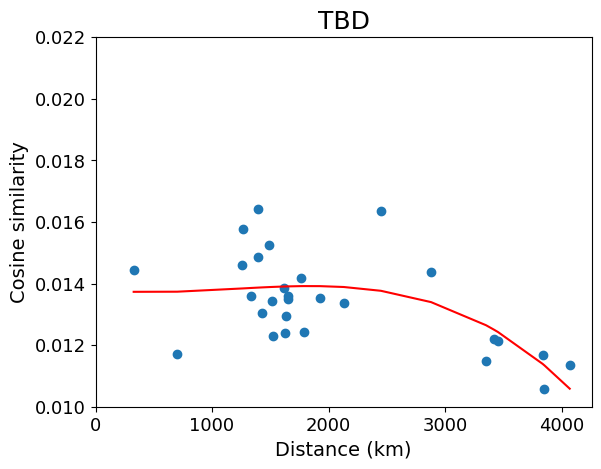




mean: 0.020689894370248704
std: 0.0037413323916070927

TEX


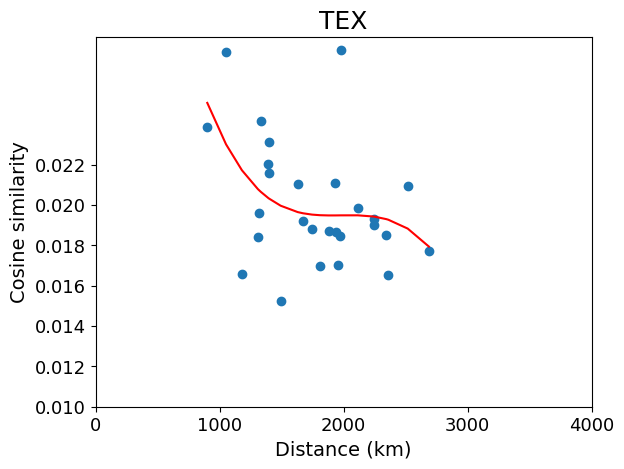




mean: 0.01567892865771269
std: 0.0018430958781275896

TOR


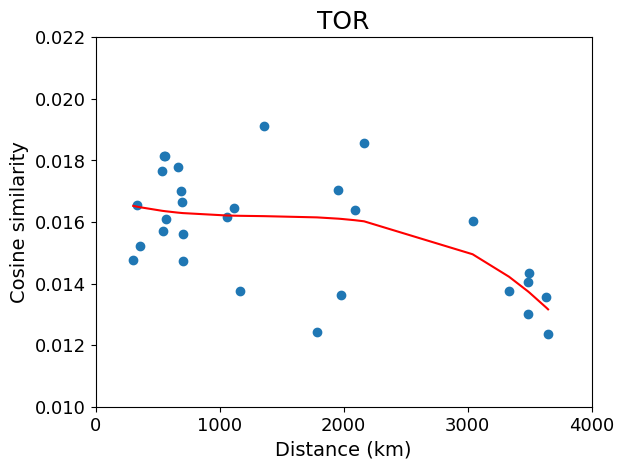




mean: 0.01997379755461642
std: 0.004035202753096032

WSN


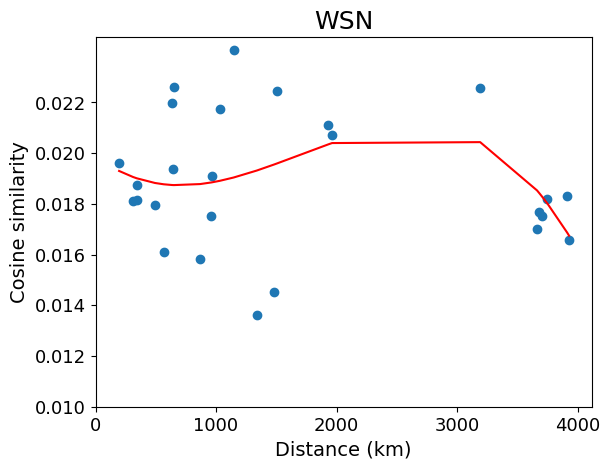




mean: 0.019337099205415754
std: 0.005471260682770121
to delete:
[30, 65, 81, 82, 87, 103, 110, 116, 130, 145, 153, 164, 188, 197, 206, 227, 234, 262, 292, 333, 357]

ALL TEAMS


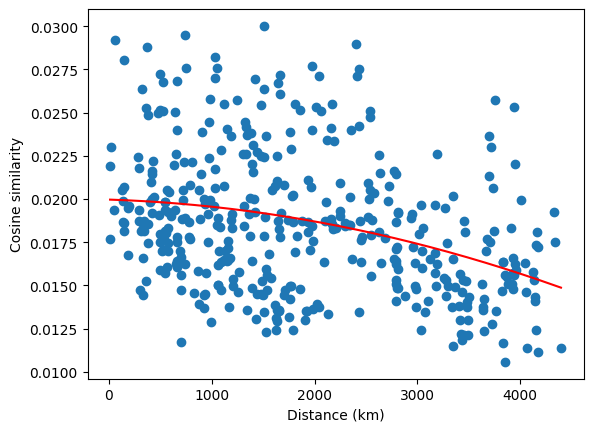

<Figure size 640x480 with 0 Axes>

In [ ]:
combined_dict = {}

for city in cities:
    distance_dic = make_distance_dic(city)
    similarity_dic = make_similarity_dic(city)

    distance_to_similarity = {}

    for city2 in cities:
        if city != city2:
            city2 = city2.lower()
            distance_to_similarity[float(distance_dic[city2])] = float(similarity_dic[city2])

    combined_dict.update(distance_to_similarity)

    lists = sorted(distance_to_similarity.items()) # sorted by key, return a list of tuples

    x, y = zip(*lists) # unpack a list of pairs into two tuples


    outliers = detect_outliers(y)

    elements_to_delete = []

    for i in outliers:
        elements_to_delete.append(y.index(i))
    # print('to delete:')
    # print(elements_to_delete)

    y = [val for val in y if val not in outliers]

    x_list = list(x)
    for i in reversed(elements_to_delete):
        x_list.pop(i)
    x = tuple(x_list)


    print('\n' + city)

    #find line of best fit
    a, b = np.polyfit(x, y, 1)
x
    #add points to plot
    plt.scatter(x, y)

    #add line of best fit to plot
    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)

    plt.plot(x, p(x), color='r')

    if (city == 'CHC'):
      city = 'Chicago'
    if (city == 'LAD'):
      city = 'Los Angeles'
    if (city == 'FLA'):
      city = 'Miami'
    plt.title(city, fontsize=18)
    plt.xlabel('Distance (km)', fontsize=14)
    plt.ylabel('Cosine similarity', fontsize=14)
    plt.xticks(np.arange(0, 4500, 1000), fontsize=13)
    plt.yticks(np.arange(0.01, 0.023, 0.002), fontsize=13)
    plt.show()

    print('\n\n')

    # print('y:', y)

    # print(detect_outliers(y))




lists = sorted(combined_dict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

outliers = detect_outliers(y)

elements_to_delete = []

for i in outliers:
    elements_to_delete.append(y.index(i))
print('to delete:')
print(elements_to_delete)

y = [val for val in y if val not in outliers]

x_list = list(x)
for i in reversed(elements_to_delete):
    x_list.pop(i)
x = tuple(x_list)


print('\nALL CITIES')

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
z = np.polyfit(x, y, 2)
p = np.poly1d(z)

plt.plot(x, p(x), color='r')
plt.xlabel('Distance (km)')
plt.ylabel('Cosine similarity')
plt.show()
plt.savefig('similarity_to_distance.png')